# **DERIVATIVE PRICING Group Work Project #2 | Group #1207**

|  |  |  |
|:---|:---|:---|
|**FULL LEGAL NAME** |  **LOCATION (COUNTRY)** |**EMAIL ADDRESSE** |
| Khaled Tamim | France | ktamim.pro@gmail.com |
| Bramuel Chetinde Aswani | Kenya | chetindeaswani@gmail.com |  
| Martin Gatore | Rwanda | gatore68@gmail.com |

---


#**STEP 1**
---

## Working with European Calls and Puts options under different pricing methods


## **Question 1** - Black-Scholes closed-form solution - **Team member A**


### 1.1 Pricing European Options using Black-Scholes closed-form solution 


**a. Number of steps**

Since we are using the Black-Scholes closed-form solution, we do not need to use a numerical method like the binomial tree model. Therefore, we do not need to choose the number of steps for the calculation.The Black-Scholes closed-form solution is an analytical formula that allows us to calculate the price of an option without having to simulate multiple paths of the underlying asset using a numerical method like the binomial tree model. The formula provides a mathematical expression for the option price as a function of the underlying asset's price, strike price, risk-free rate, volatility, and time to maturity. In contrast, the binomial tree model involves constructing a binomial tree that represents the possible price paths of the underlying asset over time, then using backward induction to calculate the option price at each node of the tree. While the binomial tree model is a powerful tool for pricing options, it can be computationally expensive and time-consuming, especially when dealing with a large number of time steps or complex option structures. Therefore, in cases where we have access to the Black-Scholes closed-form solution, we can use it to calculate the option price more efficiently and accurately than using a numerical method like the binomial tree model.


**b. Overall pricing process**

To price an ATM European call & put using the Black-Scholes closed-form solution, we can use the following formula:
$Call\ Price = S_0\ N(d_1) - K e^{-rT}\ N(d_2)$

$Put\ Price = K e^{-rT}\ N(-d_2) - S_0\ N(-d_1)$

where: $d_1 = \frac{\ln(S_0/K) + (r + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}, d_2 = d_1 - \sigma \sqrt{T}, S_0 = \text{initial stock price}, K = \text{strike price}, r = \text{risk-free interest rate}, \sigma = \text{volatility}, T = \text{time to expiration}, N(x) = \text{cumulative distribution function of the standard normal distribution}$

The overall process to price an ATM European call and put option using the Black-Scholes closed-form solution with the given parameters can be summarized as follows:
1. Define the input parameters: S0 (current stock price), r (risk-free interest rate), σ (annualized volatility), T (time to maturity in years), and K (strike price).
2. Calculate d1 and d2 using the Black-Scholes formula:
$d_1 = \frac{\ln(S_0/K) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}$ and 
$d_2 = d_1 - \sigma\sqrt{T}$
3. Calculate the option price using the Black-Scholes formula:
$Call\ Price = S_0\ N(d_1) - K e^{-rT}\ N(d_2)$ and 
$Put\ Price = K e^{-rT}\ N(-d_2) - S_0\ N(-d_1)$
where N is the cumulative distribution function of the standard normal distribution.
4. Output the option price.

For an ATM option, the strike price K is equal to the current stock price S0. We can convert the given 3-month time to maturity to years by dividing by 12.

Using these formulas, we can calculate the price of an ATM (at-the-money) European call and put option as follows:

In [1]:
import numpy as np
import scipy.stats as st
import math
from prettytable import PrettyTable


def bs_call_european(S, K, r, sigma, T):
    d1 = (math.log(S/K) + (r + sigma**2/2)*T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return S * st.norm.cdf(d1) - K * math.exp(-r*T) * st.norm.cdf(d2)

def bs_put_european(S, K, r, sigma, T):
    d1 = (math.log(S/K) + (r + sigma**2/2)*T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return K * math.exp(-r*T) * st.norm.cdf(-d2) - S * st.norm.cdf(-d1)

def check_put_call_parity(S0, K, r, T, call_price, put_price):
    parity_diff = abs(call_price + K * math.exp(-r * T) - put_price - S0)
    tolerance = 0.01 * S0  # 1% tolerance for difference between left and right sides 
    if parity_diff < tolerance:
        print("Put-Call Parity holds.")
    else:
        print("Put-Call Parity does not hold.")
    return

# Parameters
S0 = 100
r = 0.05
sigma = 0.20
T = 3/12  # 3 months
K = S0  # ATM option

# Calculating option prices
call_price = bs_call_european(S0, K, r, sigma, T)
put_price = bs_put_european(S0, K, r, sigma, T)
call_price = round(call_price,2)
put_price = round(put_price,2)
# Prices from GWP1
binomial_european_call_price = 4.61
binomial_european_put_price = 3.36
def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["1","ATM call","Eur","Binomial","BS",binomial_european_call_price,call_price,diff_prices(call_price,binomial_european_call_price)])
table.add_row(["1","ATM put","Eur","Binomial","BS",binomial_european_put_price,put_price,diff_prices(put_price,binomial_european_put_price)])
print(table)
check_put_call_parity(S0, K, r, T, call_price, put_price)


+----+----------+------+-------------+-------------+------------+------------+-------+
| Q# |   Type   | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+----------+------+-------------+-------------+------------+------------+-------+
| 1  | ATM call | Eur  |   Binomial  |      BS     |    4.61    |    4.61    |  0.0  |
| 1  | ATM put  | Eur  |   Binomial  |      BS     |    3.36    |    3.37    |  0.3  |
+----+----------+------+-------------+-------------+------------+------------+-------+
Put-Call Parity holds.


### 1.2 Computing Greek Delta for European Options using Black-Scholes closed-form solution

**a. Comparison**

The Delta of an option measures the rate of change of its price with respect to the price of the underlying asset. It is a key parameter in options trading and risk management, as it helps traders to assess the exposure of their portfolio to changes in the underlying asset price. For a European call option, the Delta is given by the partial derivative of the option price with respect to the underlying asset price S, while keeping other parameters constant:

$\Delta_{\text{call}} = \dfrac{\partial C}{\partial S} = N(d_1)$


where N is the cumulative distribution function of the standard normal distribution, and d1 is the standardized log-return of the underlying asset over the life of the option, defined as:

$d_1 = \dfrac{\ln(S/K) + \left(r + \dfrac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}$

For a European put option, the Delta is given by:

$\Delta_{\text{put}} = \dfrac{\partial P}{\partial S} = N(d_1) - 1$

where P is the put option price, and d1 is the same as for the call option.
Using the Black-Scholes closed-form solution, we can compute the Delta for an ATM European call and put using the same parameters:

In [2]:
from prettytable import PrettyTable
import numpy as np
import math
from scipy.stats import norm

def bs_call_european_delta(S, K, r, sigma, T):
    d1 = (math.log(S/K) + (r + sigma**2/2)*T) / (sigma * math.sqrt(T))
    delta = norm.cdf(d1)
    return delta

def bs_put_european_delta(S, K, r, sigma, T):
    d1 = (math.log(S/K) + (r + sigma**2/2)*T) / (sigma * math.sqrt(T))
    delta = norm.cdf(d1) - 1
    return delta

def check_put_call_parity(S0, K, r, T, call_price, put_price):
    parity_diff = abs(call_price + K * math.exp(-r * T) - put_price - S0)
    tolerance = 0.01 * S0  # 1% tolerance for difference between left and right sides 
    if parity_diff < tolerance:
        print("Put-Call Parity holds.")
    else:
        print("Put-Call Parity does not hold.")
    return
            
# Parameters
S0 = 100
r = 0.05
sigma = 0.20
T = 3/12  # 3 months
K = S0  # ATM option

# Calculating delta
call_delta = bs_call_european_delta(S0, K, r, sigma, T)
put_delta = bs_put_european_delta(S0, K, r, sigma, T)
call_delta = round(call_delta,2)
put_delta = round(put_delta,2)

# Delta from GWP1
binomial_european_call_delta = 0.57
binomial_european_put_delta = -0.43

def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["1","Delta call","Eur","Binomial","BS",binomial_european_call_delta,call_delta,diff_prices(call_delta,binomial_european_call_delta)])
table.add_row(["1","Delta put","Eur","Binomial","BS",binomial_european_put_delta,put_delta,diff_prices(put_delta,binomial_european_put_delta)])
print(table)
check_put_call_parity(S0, K, r, T, call_delta, put_delta)

+----+------------+------+-------------+-------------+------------+------------+-------+
| Q# |    Type    | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+------------+------+-------------+-------------+------------+------------+-------+
| 1  | Delta call | Eur  |   Binomial  |      BS     |    0.57    |    0.57    |  0.0  |
| 1  | Delta put  | Eur  |   Binomial  |      BS     |   -0.43    |   -0.43    |  0.0  |
+----+------------+------+-------------+-------------+------------+------------+-------+
Put-Call Parity holds.


**b. Differences and signs of Delta for both options**

The magnitude of the Delta for the call option is higher than that of the put option, which means that the call option is more sensitive to changes in the underlying asset price than the put option. This makes intuitive sense, as the payoff of the call option is increasing with the price of the underlying asset, while the payoff of the put option is decreasing with the price of the underlying asset. The signs of the Delta for both options reflect the direction of the exposure to the underlying asset price: a positive Delta means a long position, while a negative Delta means a short position. Delta proxies for the change in option price in response to changes in the underlying asset price. Obtaining a positive/negative Delta for each option makes sense because it allows traders and investors to assess the direction and magnitude of their exposure to changes in the underlying asset price. A positive Delta for a call option means that the option holder has a long position, which benefits from an increase in the underlying asset price. Similarly, a negative Delta for a put option means that the option holder has a short position, which benefits from a decrease in the underlying asset price. Delta is an important Greek for options traders and investors as it provides insight into the sensitivity of option prices to changes in the underlying asset price. The magnitude and sign of Delta for a given option can indicate the direction and magnitude of exposure to the underlying asset price, which can be used to manage risk and make informed investment decisions.


### 1.3 Understanding Option Sensitivities using Black-Scholes closed-form solution

**a. Increasing option sensitivities**

Let’s increase the volatility from 20% to 25% and compare the option prices:

In [3]:
from prettytable import PrettyTable
import numpy as np
import math
from scipy.stats import norm

# Parameters
S0 = 100
K = 100
r = 0.05
sigma_20 = 0.20
sigma_25 = 0.25
T = 0.25

# Calculating call and put options
bs_call_price_20 = round(bs_call_european(S0, K, r, sigma_20, T),2)
bs_call_price_25 = round(bs_call_european(S0, K, r, sigma_25, T),2)
bs_put_price_20 = round(bs_put_european(S0, K, r, sigma_20, T),2)
bs_put_price_25 = round(bs_put_european(S0, K, r, sigma_25, T),2)

# Vega from GWP1
binomial_european_call_price_20 = 4.61
binomial_european_put_price_20 = 3.36
binomial_european_call_price_25 = 5.59
binomial_european_put_price_25 = 4.34

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["1","Vega call 20%","Eur","Binomial","BS",binomial_european_call_price_20, bs_call_price_20,diff_prices(bs_call_price_20,binomial_european_call_price_20)])
table.add_row(["1","Vega put 20%","Eur","Binomial","BS",binomial_european_put_price_20, bs_put_price_20,diff_prices(bs_put_price_20,binomial_european_put_price_20)])
table.add_row(["1","Vega call 25%","Eur","Binomial","BS",binomial_european_call_price_25, bs_call_price_25,diff_prices(bs_call_price_25,binomial_european_call_price_25)])
table.add_row(["1","Vega put 25%","Eur","Binomial","BS",binomial_european_put_price_25, bs_put_price_25,diff_prices(bs_put_price_25,binomial_european_put_price_25)])

print(table)

# Put-Call parity check
check_put_call_parity(S0, K, r, T, bs_call_price_20, bs_put_price_20)
check_put_call_parity(S0, K, r, T, bs_call_price_25, bs_put_price_25)

+----+---------------+------+-------------+-------------+------------+------------+-------+
| Q# |      Type     | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+---------------+------+-------------+-------------+------------+------------+-------+
| 1  | Vega call 20% | Eur  |   Binomial  |      BS     |    4.61    |    4.61    |  0.0  |
| 1  |  Vega put 20% | Eur  |   Binomial  |      BS     |    3.36    |    3.37    |  0.3  |
| 1  | Vega call 25% | Eur  |   Binomial  |      BS     |    5.59    |    5.6     |  0.18 |
| 1  |  Vega put 25% | Eur  |   Binomial  |      BS     |    4.34    |    4.36    |  0.46 |
+----+---------------+------+-------------+-------------+------------+------------+-------+
Put-Call Parity holds.
Put-Call Parity holds.


From the table, we can see that the call and put option prices increase with a 5% increase in volatility. The call option price increases from 4.61 to 5.60, and the put option price increases from 3.37 to 4.36.

**b. Potential differential impact**

The impact of an increase in volatility can have a differential impact on call and put options due to their asymmetrical payoff structures. On one hand, a call option benefits from an increase in volatility because it increases the likelihood of the underlying asset price rising above the strike price, leading to a higher payoff. On the other hand, a put option benefits from a decrease in volatility because it increases the likelihood of the underlying asset price falling below the strike price, leading to a higher payoff. Therefore, an increase in volatility will have a greater positive impact on call option prices compared to put option prices.


## **Question 2** - Monte-Carlo methods under a general GBM equation - **Team member B**


### 2.1 Pricing European Options using Monte-Carlo methods under a general GBM equation


**a. Number of steps**

Monte-Carlo methods are a popular numerical technique used to price options by simulating the underlying asset's price process. In this case, we will use Monte-Carlo methods to price ATM European options under a general Geometric Brownian Motion (GBM) equation with daily time-steps in the simulations. In order to achieve reliable estimates, we will choose a large number of simulations (e.g., 100,000 simulations). We will also choose a daily time-step for the simulations. The more time-steps we use, the more accurate our estimate will be, but the longer the simulation will take to run. A convenient number of time-steps to achieve reliable estimates is 252, which corresponds to the number of trading days in a year (excluding weekends).

**b. Overall pricing process**

To price an ATM European call and put using Monte-Carlo methods under a general Geometric Brownian Motion (GBM) equation with daily time-steps, we can follow these steps:
1. Define the parameters:
$S_0$: The current price of the underlying asset (e.g., stock)
$r$: The risk-free interest rate
$\sigma$: The volatility of the underlying asset
$T$: The time to maturity of the option
For this problem, we have $S_0 = 100$, $r = 5%$, $\sigma = 20%$, and $T = 3$ months.

2. Calculate the daily drift and volatility: We need to convert the annualized values of $r$ and $\sigma$ to daily values. The daily drift ($\mu$) is given by: $\mu = (r - \sigma^2/2)/252$. The daily volatility ($v$) is given by: $v = \sigma / \sqrt{252}$.

3. Generate random stock prices at maturity: We need to simulate the stock price at the time of option maturity using a Monte-Carlo simulation. We can generate a large number of random stock prices by using the following equation: $S(T) = S_0 \exp((\mu - 0.5v^2)T + vZ\sqrt{T})$. where $Z$ is a random variable drawn from a standard normal distribution.

4. Calculate the payoff of the option: The payoff of an ATM European call and put option is given by:

Call payoff = $\max(S(T) - K, 0)$

Put payoff = $\max(K - S(T), 0)$

where $K$ is the strike price of the option.

5. Calculate the option price: To estimate the option price, we need to take the average of the payoffs and discount it back to the present using the risk-free interest rate. The option price can be calculated as follows:

Call price = $\exp(-rT) * \sum(Call payoff) /$ number of simulations

Put price = $\exp(-rT) * \sum(Put payoff) /$ number of simulations

where the sum is taken over all the simulated stock prices and number of simulations is the total number of simulated stock prices.


Reason for choosing 252 steps in the tree:
Choosing 252 steps in the tree ensures that we simulate the daily movements of the stock price accurately. This number is sufficient to capture the volatility of the underlying asset and produce reliable estimates of the option price. Moreover, it corresponds to the number of trading days in a year, which is a natural choice for daily time-steps.
Using these formulas, we can calculate the price of an ATM (at-the-money) European call and put option as follows:

In [4]:
import numpy as np
import math
from prettytable import PrettyTable
from scipy.stats import norm

def mc_call_european(S0, r, sigma, T, K, N, M):
    # compute daily drift and volatility
    dt = T / M
    mu = r - 0.5 * sigma**2
    daily_drift = mu * dt
    daily_volatility = sigma * np.sqrt(dt)
    # simulate stock price paths
    S = np.zeros((N, M + 1))
    S[:, 0] = S0
    for i in range(M):
        rand = np.random.randn(N)
        S[:, i + 1] = S[:, i] * np.exp(daily_drift + daily_volatility * rand)
    # compute option prices
    discount_factor = np.exp(-r * T)
    payoff_call = np.maximum(S[:, -1] - K, 0)
    price_call = discount_factor * np.mean(payoff_call)
    payoff_put = np.maximum(K - S[:, -1], 0)
    price_put = discount_factor * np.mean(payoff_put)
    return price_call

def mc_put_european(S0, r, sigma, T, K, N, M):
    # compute daily drift and volatility
    dt = T / M
    mu = r - 0.5 * sigma**2
    daily_drift = mu * dt
    daily_volatility = sigma * np.sqrt(dt)
    # simulate stock price paths
    S = np.zeros((N, M + 1))
    S[:, 0] = S0
    for i in range(M):
        rand = np.random.randn(N)
        S[:, i + 1] = S[:, i] * np.exp(daily_drift + daily_volatility * rand)
    # compute option prices
    discount_factor = np.exp(-r * T)
    payoff_call = np.maximum(S[:, -1] - K, 0)
    price_call = discount_factor * np.mean(payoff_call)
    payoff_put = np.maximum(K - S[:, -1], 0)
    price_put = discount_factor * np.mean(payoff_put)
    return price_put

def check_put_call_parity(S0, K, r, T, call_price, put_price):
    parity_diff = abs(call_price + K * math.exp(-r * T) - put_price - S0)
    tolerance = 0.01 * S0  # 1% tolerance for difference between left and right sides 
    if parity_diff < tolerance:
        print("Put-Call Parity holds.")
    else:
        print("Put-Call Parity does not hold.")
    return


# Parameters
S0 = 100  # current price of the underlying asset
r = 0.05  # risk-free interest rate
sigma = 0.2  # volatility of the underlying asset
T = 0.25  # time to maturity in years
K = 100  # strike price
N = 100000 # simulations
M = 252 # daily time steps

# Calculating option prices
call_price = mc_call_european(S0, r, sigma, T, K, N, M)
put_price = mc_put_european(S0, r, sigma, T, K, N, M)
call_price = round(call_price,2)
put_price = round(put_price,2)
# Prices from GWP1
binomial_european_call_price = 4.61
binomial_european_put_price = 3.36
def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["2","ATM call","Eur","Binomial","MC",binomial_european_call_price,call_price,diff_prices(call_price,binomial_european_call_price)])
table.add_row(["2","ATM put","Eur","Binomial","MC",binomial_european_put_price,put_price,diff_prices(put_price,binomial_european_put_price)])
print(table)
check_put_call_parity(S0, K, r, T, call_price, put_price)

+----+----------+------+-------------+-------------+------------+------------+-------+
| Q# |   Type   | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+----------+------+-------------+-------------+------------+------------+-------+
| 2  | ATM call | Eur  |   Binomial  |      MC     |    4.61    |    4.61    |  0.0  |
| 2  | ATM put  | Eur  |   Binomial  |      MC     |    3.36    |    3.36    |  0.0  |
+----+----------+------+-------------+-------------+------------+------------+-------+
Put-Call Parity holds.


### 2.2 Computing Greek Delta for European Options using Monte-Carlo methods under a general GBM equation

**a. Comparison**

Using Monte-Carlo methods under a general GBM equation, we can compute the Delta for an ATM European call and put using the same parameters:


In [5]:
import numpy as np
from scipy.stats import norm
from prettytable import PrettyTable

def mc_call_european_delta(S0, r, sigma, T, K, n_simulations, n_steps):
    dt = T / n_steps
    mu = r - 0.5 * sigma**2
    daily_drift = mu * dt
    daily_volatility = sigma * np.sqrt(dt)
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0
    for i in range(n_steps):
        rand = np.random.randn(n_simulations)
        S[:, i + 1] = S[:, i] * np.exp(daily_drift + daily_volatility * rand)
    discount_factor = np.exp(-r * T)
    payoff_call = np.maximum(S[:, -1] - K, 0)
    price_call = discount_factor * np.mean(payoff_call)
    delta_call = discount_factor * np.mean(norm.cdf((np.log(S[:, -1] / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))))
    return delta_call

def mc_put_european_delta(S0, r, sigma, T, K, n_simulations, n_steps):
    dt = T / n_steps
    mu = r - 0.5 * sigma**2
    daily_drift = mu * dt
    daily_volatility = sigma * np.sqrt(dt)
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0
    for i in range(n_steps):
        rand = np.random.randn(n_simulations)
        S[:, i + 1] = S[:, i] * np.exp(daily_drift + daily_volatility * rand)
    discount_factor = np.exp(-r * T)
    payoff_put = np.maximum(K - S[:, -1], 0)
    price_put = discount_factor * np.mean(payoff_put)
    delta_put = discount_factor * np.mean(norm.cdf((np.log(S[:, -1] / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))) - 1)
    return delta_put


# Parameters
S0 = 100  # current price of the underlying asset
r = 0.05  # risk-free interest rate
sigma = 0.2  # volatility of the underlying asset
T = 0.25  # time to maturity in years
K = S0  # strike price
N = 100000 # simulations
M = 252 # daily time steps

# Calculating delta
call_delta = mc_call_european_delta(S0, r, sigma, T, K, N, M)
put_delta = mc_put_european_delta(S0, r, sigma, T, K, N, M)
call_delta = round(call_delta,2)
put_delta = round(put_delta,2)

# Delta from GWP1
binomial_european_call_delta = 0.57
binomial_european_put_delta = -0.43

def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["2","Delta call","Eur","Binomial","MC",binomial_european_call_delta,call_delta,diff_prices(call_delta,binomial_european_call_delta)])
table.add_row(["2","Delta put","Eur","Binomial","Mc",binomial_european_put_delta,put_delta,diff_prices(put_delta,binomial_european_put_delta)])
print(table)
check_put_call_parity(S0, K, r, T, call_delta, put_delta)

+----+------------+------+-------------+-------------+------------+------------+-------+
| Q# |    Type    | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+------------+------+-------------+-------------+------------+------------+-------+
| 2  | Delta call | Eur  |   Binomial  |      MC     |    0.57    |    0.56    |  1.77 |
| 2  | Delta put  | Eur  |   Binomial  |      Mc     |   -0.43    |   -0.45    |  4.55 |
+----+------------+------+-------------+-------------+------------+------------+-------+
Put-Call Parity holds.


Comparing the Monte Carlo Delta of an ATM European call option and an ATM European put option calculated in the previous question, we can see that the Delta of the call option is positive, while the Delta of the put option is negative. This is consistent with the theoretical values of Delta for these options.

**b. Differences and signs of Delta for both options**

Delta is a measure of the sensitivity of the option price to changes in the underlying asset price. Specifically, it represents the change in the option price for a small change in the underlying asset price. A positive Delta indicates that the option price increases as the underlying asset price increases, while a negative Delta indicates that the option price decreases as the underlying asset price increases. For an ATM European call option, the Delta is positive because the option price increases as the underlying asset price increases. This makes sense because if the stock price goes up, the call option becomes more valuable because the holder has the right to buy the stock at the lower strike price. Therefore, the call option provides a way to benefit from a potential increase in the stock price. For an ATM European put option, the Delta is negative because the option price decreases as the underlying asset price increases. This makes sense because if the stock price goes up, the put option becomes less valuable because the holder has the right to sell the stock at the higher strike price. Therefore, the put option provides a way to protect against a potential decrease in the stock price.

### 2.3 Understanding Option Sensitivities using Monte-Carlo methods under a general GBM equation

**a. Increasing option sensitivities**

To compute the sensitivity of the previous put and call option prices to a 5% increase in volatility, we can first calculate the option prices using the original parameters (S0=100, r=5%, σ=20%, T=3 months) and then calculate the option prices again using a new volatility of 25% while keeping all other parameters constant. We can then calculate the difference in option prices between the two scenarios and divide by the original option price to obtain the sensitivity, or Vega.

We can implement this using the following Python code:

In [6]:
from prettytable import PrettyTable
import numpy as np
import math
from scipy.stats import norm

# Parameters
S0 = 100
K = S0
r = 0.05
sigma_20 = 0.20
sigma_25 = 0.25
T = 0.25
N = 100000 # simulations
M = 252 # daily time steps

# Calculating call and put options
mc_call_price_20 = round(mc_call_european(S0, r, sigma_20, T, K, N, M), 2)
mc_call_price_25 = round(mc_call_european(S0, r, sigma_25, T, K, N, M), 2)
mc_put_price_20 = round(mc_put_european(S0, r, sigma_20, T, K, N, M), 2)
mc_put_price_25 = round(mc_put_european(S0, r, sigma_25, T, K, N, M), 2)

# Vega from GWP1
binomial_european_call_price_20 = 4.61
binomial_european_put_price_20 = 3.36
binomial_european_call_price_25 = 5.59
binomial_european_put_price_25 = 4.34

def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)
    
# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["2","Vega call 20%","Eur","Binomial","MC",binomial_european_call_price_20, mc_call_price_20, diff_prices(mc_call_price_20, mc_call_price_20)])
table.add_row(["2","Vega put 20%","Eur","Binomial","MC",binomial_european_put_price_20, mc_put_price_20, diff_prices(mc_put_price_20, mc_put_price_20)])
table.add_row(["2","Vega call 25%","Eur","Binomial","MC",binomial_european_call_price_25, mc_call_price_25, diff_prices(mc_call_price_25, mc_call_price_25)])
table.add_row(["2","Vega put 25%","Eur","Binomial","MC",binomial_european_put_price_25, mc_put_price_25, diff_prices(mc_put_price_25, mc_put_price_25)])
print(table)
check_put_call_parity(S0, K, r, T, mc_call_price_20, mc_put_price_20)
check_put_call_parity(S0, K, r, T, mc_call_price_25, mc_put_price_25)

+----+---------------+------+-------------+-------------+------------+------------+-------+
| Q# |      Type     | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+---------------+------+-------------+-------------+------------+------------+-------+
| 2  | Vega call 20% | Eur  |   Binomial  |      MC     |    4.61    |    4.61    |  0.0  |
| 2  |  Vega put 20% | Eur  |   Binomial  |      MC     |    3.36    |    3.38    |  0.0  |
| 2  | Vega call 25% | Eur  |   Binomial  |      MC     |    5.59    |    5.58    |  0.0  |
| 2  |  Vega put 25% | Eur  |   Binomial  |      MC     |    4.34    |    4.33    |  0.0  |
+----+---------------+------+-------------+-------------+------------+------------+-------+
Put-Call Parity holds.
Put-Call Parity holds.


From the table above, we can see that the Vega for the call option increased from 4.61 to 5.59, and the Vega for the put option increased from 3.38 to 4.36, as the volatility increased from 20% to 25%. The option prices also increased as the volatility increased.

**b. Potential differential impact**

The potential differential impact of this change for call and put options is that the call option price generally increases with increasing volatility, while the put option price generally decreases with increasing volatility. This is because higher volatility increases the probability of the underlying asset's price moving away from the strike price, which benefits the call option but hurts the put option. The difference in impact between the two options can be seen in their respective Vegas, where the call option has a higher Vega than the put option.

## **Question 3** - Put-Call parity - **Team member C**

**a. Put-Call parity check**


Let’s sum up the prices and put-call parity for both Black-Scholes closed-form solution and Monte Carlo methods:

In [7]:
import numpy as np
import scipy.stats as st
import math
from prettytable import PrettyTable

# Parameters
S0 = 100
r = 0.05
sigma = 0.20
T = 3/12  # 3 months
K = S0  # ATM option
N = 100000
M = 252

# Calculating option prices
bs_call_price = bs_call_european(S0, K, r, sigma, T)
bs_put_price = bs_put_european(S0, K, r, sigma, T)
bs_call_price = round(bs_call_price,2)
bs_put_price = round(bs_put_price,2)
mc_call_price = mc_call_european(S0, r, sigma, T, K, N, M)
mc_put_price = mc_put_european(S0, r, sigma, T, K, N, M)
mc_call_price = round(mc_call_price,2)
mc_put_price = round(mc_put_price,2)
# Prices from GWP1
binomial_european_call_price = 4.61
binomial_european_put_price = 3.36
def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)
def check_put_call_parity(S0, K, r, T, call_price, put_price):
    parity_diff = abs(call_price + K * math.exp(-r * T) - put_price - S0)
    tolerance = 0.01 * S0  # 1% tolerance for difference between left and right sides 
    if parity_diff < tolerance:
        return "holds"
    else:
        return "does not hold"
    return
# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP2 Method","GWP2 Call Price", "GWP2 Put Price", "put-call parity"]
table.add_row(["1","ATM","Eur","BS",bs_call_price,bs_put_price,check_put_call_parity(S0, K, r, T, bs_call_price, bs_put_price)])
table.add_row(["2","ATM","Eur","MC",mc_call_price,mc_put_price,check_put_call_parity(S0, K, r, T, mc_call_price, mc_put_price)])
print(table)
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["1","ATM call","Eur","Binomial","BS",binomial_european_call_price,bs_call_price,diff_prices(bs_call_price,binomial_european_call_price)])
table.add_row(["1","ATM put","Eur","Binomial","BS",binomial_european_put_price,bs_put_price,diff_prices(bs_put_price,binomial_european_put_price)])
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["2","ATM call","Eur","Binomial","MC",binomial_european_call_price,mc_call_price,diff_prices(mc_call_price,binomial_european_call_price)])
table.add_row(["2","ATM put","Eur","Binomial","MC",binomial_european_put_price,mc_put_price,diff_prices(mc_put_price,binomial_european_put_price)])
print(table)

+----+------+------+-------------+-----------------+----------------+-----------------+
| Q# | Type | Exer | GWP2 Method | GWP2 Call Price | GWP2 Put Price | put-call parity |
+----+------+------+-------------+-----------------+----------------+-----------------+
| 1  | ATM  | Eur  |      BS     |       4.61      |      3.37      |      holds      |
| 2  | ATM  | Eur  |      MC     |       4.61      |      3.39      |      holds      |
+----+------+------+-------------+-----------------+----------------+-----------------+
+----+----------+------+-------------+-------------+------------+------------+-------+
| Q# |   Type   | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+----------+------+-------------+-------------+------------+------------+-------+
| 1  | ATM call | Eur  |   Binomial  |      BS     |    4.61    |    4.61    |  0.0  |
| 1  | ATM put  | Eur  |   Binomial  |      BS     |    3.36    |    3.37    |  0.3  |
| 2  | ATM call | Eur  |   Binomial  

Put-Call parity holds for both methods under the ATM case, as the difference between the call and put prices is very small.

**b. Prices comparison**

From the table, we can see that the prices obtained under the two methods differ slightly for both call and put options. The percentage differences are relatively small, indicating that the results from the two methods are relatively close. However, there is a slight difference in the price obtained from the two methods for both call and put options. The Black-Scholes model is a closed-form solution and uses a number of assumptions, such as constant volatility and risk-free rate, which may not always hold in practice. On the other hand, Monte Carlo simulation can be used to price more complex options, and can handle a wider range of underlying asset dynamics and option structures. The convergence of the two methods depends on the parameters used in the models, the level of accuracy desired, and the computational resources available. In general, Monte Carlo simulation can be more accurate than the Black-Scholes model, but it requires more computational resources and is slower. The convergence of the prices obtained using different methods depends on the accuracy and efficiency of the methods used. Usually, more accurate and efficient methods will produce prices that are closer to the true value of the option, and thus these prices will converge more quickly as the number of simulations or calculations increases. In the case of the two methods used here (binomial and Monte Carlo), the prices obtained for both the call and put options are quite close to each other, with differences ranging from 0.3% to 0.6%. This suggests that both methods are fairly accurate, and that they converge relatively quickly. One reason why the prices obtained using both methods may converge is that they are both based on similar assumptions and models. Both the binomial and Monte Carlo methods are based on the same basic option pricing model, which assumes that the underlying asset price follows a stochastic process (e.g., geometric Brownian motion), and that the option price can be calculated using a discounted expected value of the option payoff. Another reason why the prices obtained using both methods may converge is that they are both based on simulations or calculations that are designed to approximate the true value of the option. As the number of simulations or calculations increases, the approximation becomes more accurate, and the prices obtained using both methods become more similar.

#**STEP 2**
---

## Working with American Calls and Puts options under different pricing methods

## **Question 4** - American **Call** using Monte-Carlo and GBM - **Team member A**

### 4.1 Pricing American Call using Monte-Carlo methods under a general GBM equation 


**a. Number of steps**

For pricing an ATM American call using Monte-Carlo methods under a general Geometric Brownian Motion (GBM) equation with daily simulations, we need to choose the number of steps in the tree. Generally, the more steps we use, the more accurate our estimate will be, but the longer the simulation will take to run. A convenient number of steps to achieve reliable estimates is 252, which corresponds to the number of trading days in a year (excluding weekends). However, for American options, we need to take into account the possibility of early exercise, which can occur at any time during the option's life. Therefore, we may need to use more steps in the tree to capture the optimal exercise time accurately.

**b. Overall pricing process**

The overall process for pricing an ATM American call using Monte-Carlo methods under a general Geometric Brownian Motion (GBM) equation with daily simulations is similar to that for European options. The steps are as follows:

1. Define the parameters: S0, r, σ, and T.
2. Calculate the daily drift (μ) and volatility (v).
3. Generate random stock prices at maturity using a Monte-Carlo simulation.
4. Calculate the payoff of the option at maturity using the early exercise rule, which states that the option can be exercised if the stock price is greater than or equal to the strike price.
5. Calculate the option price at each time step by taking the average of the discounted payoffs.
6. Iterate backward in time from the option maturity date to the present to determine the optimal exercise time at each time step.
7. Calculate the option price at each time step, taking into account the optimal exercise time.

The reason for choosing a large number of steps in the tree is to capture the optimal exercise time accurately and to produce reliable estimates of the option price. In general, we may need to use more steps in the tree for American options than for European options to account for the possibility of early exercise. However, the number of steps required depends on the specific option and market conditions and may need to be determined empirically.

In [8]:
import numpy as np
import math
from prettytable import PrettyTable
from scipy.stats import norm

def mc_call_american(S0, r, sigma, T, K, N, M):
    # compute daily drift and volatility
    dt = T / M
    mu = r - 0.5 * sigma**2
    daily_drift = mu * dt
    daily_volatility = sigma * np.sqrt(dt)
    # simulate stock price paths
    S = np.zeros((N, M + 1))
    S[:, 0] = S0
    for i in range(M):
        rand = np.random.randn(N)
        S[:, i + 1] = S[:, i] * np.exp(daily_drift + daily_volatility * rand)
        # check if early exercise is optimal
        exercise_value = np.maximum(S[:, i + 1] - K, 0)
        continuation_value = np.maximum(S[:, i] * np.exp(daily_drift + daily_volatility * rand) - K, 0)
        S[:, i + 1] = np.where(exercise_value > continuation_value, exercise_value, S[:, i + 1])
    # compute option prices
    discount_factor = np.exp(-r * T)
    payoff_call = np.maximum(S[:, -1] - K, 0)
    price_call = discount_factor * np.mean(payoff_call)
    return price_call

def check_put_call_parity(S0, K, r, T, call_price, put_price):
    parity_diff = abs(call_price + K * math.exp(-r * T) - put_price - S0)
    tolerance = 0.01 * S0  # 1% tolerance for difference between left and right sides 
    if parity_diff < tolerance:
        print("Put-Call Parity holds.")
    else:
        print("Put-Call Parity does not hold.")
    return


# Parameters
S0 = 100  # current price of the underlying asset
r = 0.05  # risk-free interest rate
sigma = 0.2  # volatility of the underlying asset
T = 0.25  # time to maturity in years
K = 100  # strike price
N = 100000 # simulations
M = 252 # daily time steps

# Calculating option prices
call_price = mc_call_american(S0, r, sigma, T, K, N, M)
call_price = round(call_price,2)
# Prices from GWP1
binomial_american_call_price = 4.61
binomial_american_put_price = 3.47

def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["4","ATM call","Amer","Binomial","MC",binomial_american_call_price,call_price,diff_prices(call_price,binomial_american_call_price)])
print(table)
# check_put_call_parity(S0, K, r, T, call_price, put_price)

+----+----------+------+-------------+-------------+------------+------------+-------+
| Q# |   Type   | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+----------+------+-------------+-------------+------------+------------+-------+
| 4  | ATM call | Amer |   Binomial  |      MC     |    4.61    |    4.61    |  0.0  |
+----+----------+------+-------------+-------------+------------+------------+-------+


### 4.2 Computing Greek Delta for American Call using Monte-Carlo methods under a general GBM equation

**a. Comparison**

Using Monte-Carlo methods under a general GBM equation, we can compute the Delta for an ATM American call using the same parameters:


In [9]:
import numpy as np
from scipy.stats import norm
from prettytable import PrettyTable

def mc_call_american_delta(S0, r, sigma, T, K, n_simulations, n_steps):
    dt = T / n_steps
    n = int(T * 252)
    df = np.exp(-r * dt)
    v = sigma**2 * dt
    rfr = (r - 0.5 * v) * dt
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0
    for i in range(1, n_steps + 1):
        rn = np.random.normal(size=n_simulations)
        S[:, i] = S[:, i - 1] * np.exp(rfr + np.sqrt(v) * rn)
        early_exercise = np.maximum(S[:, i] - K, 0)
        for j in range(i - 1, -1, -1):
            continuation_value = np.exp(-r * (j + 1) * dt) * np.mean(early_exercise)
            early_exercise = np.maximum(S[:, j] - K, 0)
            early_exercise[early_exercise >= continuation_value] = 0
        early_exercise[early_exercise == 0] = np.nan
        S[:, i] = np.nanmax(np.column_stack((S[:, i], early_exercise)), axis=1)
    payoff_call = np.maximum(S[:, -1] - K, 0)
    price_call = df * np.mean(payoff_call)
    delta_call = df * np.mean(norm.cdf((np.log(S[:, -1] / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))))
    return delta_call

# Parameters
S0 = 100  # current price of the underlying asset
r = 0.05  # risk-free interest rate
sigma = 0.2  # volatility of the underlying asset
T = 0.25  # time to maturity in years
K = S0  # strike price
N = 100000 # simulations
M = 252 # daily time steps

# Calculating delta
call_delta = mc_call_american_delta(S0, r, sigma, T, K, N, M)
call_delta = round(call_delta,2)

# Delta from GWP1
binomial_american_call_delta = 0.57
binomial_american_put_delta = 0

def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["4","Delta call","Amer","Binomial","MC",binomial_american_call_delta,call_delta,diff_prices(call_delta,binomial_american_call_delta)])
print(table)

+----+------------+------+-------------+-------------+------------+------------+-------+
| Q# |    Type    | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+------------+------+-------------+-------------+------------+------------+-------+
| 4  | Delta call | Amer |   Binomial  |      MC     |    0.57    |    0.58    |  1.74 |
+----+------------+------+-------------+-------------+------------+------------+-------+


Comparing the Monte Carlo Delta of an ATM American call option and an ATM American put option does not apply here. Instead we can compare the call price for the 2 methods (GWP1 and GWP2). Based on the comparison between the GWP1 Price and GWP2 Price, we can conclude that the Monte Carlo method (GWP2) results in a slightly higher price for the Delta call option compared to the binomial method (GWP1). The %diff column in the table shows that the difference between the two prices is around 3.51%. The reason for this difference is likely due to the different assumptions and techniques used by the two pricing methods. The binomial model assumes that the underlying asset price can only move up or down in discrete steps, while the Monte Carlo method models the underlying asset price as a continuous stochastic process. The Monte Carlo method can also handle more complex payoff structures and is generally considered more accurate, but it can be computationally intensive and requires more simulations to achieve a high level of accuracy.

**b. Differences and signs of Delta for both options**

The delta is positive here. A positive delta for a call option indicates that the option price is expected to increase as the underlying asset price increases, while a negative delta for a put option indicates that the option price is expected to decrease as the underlying asset price increases.

### 4.3 Understanding Option Sensitivities using Monte-Carlo methods under a general GBM equation

**a. Increasing option sensitivities**

To compute the sensitivity of the previous call option price to a 5% increase in volatility, we can first calculate the option price using the original parameters (S0=100, r=5%, σ=20%, T=3 months) and then calculate the option price again using a new volatility of 25% while keeping all other parameters constant. We can then calculate the difference in option prices between the two scenarios and divide by the original option price to obtain the sensitivity, or Vega.

We can implement this using the following Python code:

In [10]:
from prettytable import PrettyTable
import numpy as np
import math
from scipy.stats import norm

# Parameters
S0 = 100
K = S0
r = 0.05
sigma_20 = 0.20
sigma_25 = 0.25
T = 0.25
N = 100000 # simulations
M = 252 # daily time steps

# Calculating call option
mc_call_price_20 = round(mc_call_american(S0, r, sigma_20, T, K, N, M), 2)
mc_call_price_25 = round(mc_call_american(S0, r, sigma_25, T, K, N, M), 2)

# Vega from GWP1
binomial_american_call_price_20 = 4.61
binomial_american_put_price_20 = 3.36
binomial_american_call_price_25 = 5.59
binomial_american_put_price_25 = 4.34

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["4","Vega call 20%","Amer","Binomial","MC",binomial_american_call_price_20, mc_call_price_20, diff_prices(binomial_american_call_price_20, mc_call_price_20)])
table.add_row(["4","Vega call 25%","Amer","Binomial","MC",binomial_american_call_price_25, mc_call_price_25, diff_prices(binomial_american_call_price_25, mc_call_price_25)])
print(table)

+----+---------------+------+-------------+-------------+------------+------------+-------+
| Q# |      Type     | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+---------------+------+-------------+-------------+------------+------------+-------+
| 4  | Vega call 20% | Amer |   Binomial  |      MC     |    4.61    |    4.58    |  0.65 |
| 4  | Vega call 25% | Amer |   Binomial  |      MC     |    5.59    |    5.57    |  0.36 |
+----+---------------+------+-------------+-------------+------------+------------+-------+


From the table above, we can see that the Vega for the call option increased from 4.61 to 5.58 as the volatility increased from 20% to 25%. The option price also increased as the volatility increased.

**b. Potential differential impact**

The potential differential impact of this change for call option is that the call option price generally increases with increasing volatility. This is because higher volatility increases the probability of the underlying asset's price moving away from the strike price, which benefits the call option.

## **Question 5** - American **Put** using Monte-Carlo and GBM - **Team member B**

### 5.1 Pricing American Put using Monte-Carlo methods under a general GBM equation 


**a. Number of steps**

For pricing an ATM American put using Monte-Carlo methods under a general Geometric Brownian Motion (GBM) equation with daily simulations, we also need to choose the number of steps in the tree. Like with American calls, the more steps we use, the more accurate our estimate will be, but the longer the simulation will take to run. We need to take into account the possibility of early exercise, which can occur at any time during the option's life. Therefore, we may need to use more steps in the tree to capture the optimal exercise time accurately.

**b. Overall pricing process**

The overall process for pricing an ATM American put using Monte-Carlo methods under a general Geometric Brownian Motion (GBM) equation with daily simulations is similar to that for American calls. The steps are as follows:

1. Define the parameters: S0, r, σ, and T.
2. Calculate the daily drift (μ) and volatility (v).
3. Generate random stock prices at maturity using a Monte-Carlo simulation.
4. Calculate the payoff of the option at maturity using the early exercise rule, which states that the option can be exercised if the stock price is less than or equal to the strike price.
5. Calculate the option price at each time step by taking the average of the discounted payoffs.
6. Iterate backward in time from the option maturity date to the present to determine the optimal exercise time at each time step.
7. Calculate the option price at each time step, taking into account the optimal exercise time.

Like with American calls, the reason for choosing a large number of steps in the tree is to capture the optimal exercise time accurately and to produce reliable estimates of the option price. In general, we may need to use more steps in the tree for American puts than for European options to account for the possibility of early exercise. However, the number of steps required depends on the specific option and market conditions and may need to be determined empirically.

In [11]:
import numpy as np
import math
from prettytable import PrettyTable
from scipy.stats import norm

def mc_put_american(S0, r, sigma, T, K, N, M):
    # compute daily drift and volatility
    dt = T / M
    mu = r - 0.5 * sigma**2
    daily_drift = mu * dt
    daily_volatility = sigma * np.sqrt(dt)
    # simulate stock price paths
    S = np.zeros((N, M + 1))
    S[:, 0] = S0
    for i in range(M):
        rand = np.random.randn(N)
        S[:, i + 1] = S[:, i] * np.exp(daily_drift + daily_volatility * rand)
        # check if early exercise is optimal
        exercise_value = np.maximum(K - S[:, i + 1], 0)
        continuation_value = np.maximum(K - S[:, i] * np.exp(daily_drift + daily_volatility * rand), 0)
        S[:, i + 1] = np.where(exercise_value > continuation_value, exercise_value, S[:, i + 1])
    # compute option prices
    discount_factor = np.exp(-r * T)
    payoff_put = np.maximum(K - S[:, -1], 0)
    price_put = discount_factor * np.mean(payoff_put)
    return price_put

def check_put_call_parity(S0, K, r, T, call_price, put_price):
    parity_diff = abs(call_price + K * math.exp(-r * T) - put_price - S0)
    tolerance = 0.01 * S0  # 1% tolerance for difference between left and right sides 
    if parity_diff < tolerance:
        print("Put-Call Parity holds.")
    else:
        print("Put-Call Parity does not hold.")
    return


# Parameters
S0 = 100  # current price of the underlying asset
r = 0.05  # risk-free interest rate
sigma = 0.2  # volatility of the underlying asset
T = 0.25  # time to maturity in years
K = 100  # strike price
N = 100000 # simulations
M = 252 # daily time steps

# Calculating option prices
call_price = mc_call_american(S0, r, sigma, T, K, N, M)
put_price = mc_put_american(S0, r, sigma, T, K, N, M)
call_price = round(call_price,2)
put_price = round(put_price,2)
# Prices from GWP1
binomial_american_call_price = 4.61
binomial_american_put_price = 3.47

def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["5","ATM put","Amer","Binomial","MC",binomial_american_put_price,put_price,diff_prices(put_price,binomial_american_put_price)])
print(table)
check_put_call_parity(S0, K, r, T, call_price, put_price)

+----+---------+------+-------------+-------------+------------+------------+-------+
| Q# |   Type  | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+---------+------+-------------+-------------+------------+------------+-------+
| 5  | ATM put | Amer |   Binomial  |      MC     |    3.47    |    3.42    |  1.45 |
+----+---------+------+-------------+-------------+------------+------------+-------+
Put-Call Parity holds.


### 5.2 Computing Greek Delta for American Put using Monte-Carlo methods under a general GBM equation

**a. Comparison**

Using Monte-Carlo methods under a general GBM equation, we can compute the Delta for an ATM American put using the same parameters:


In [12]:
import numpy as np
from scipy.stats import norm
from prettytable import PrettyTable

def mc_put_american_delta(S0, r, sigma, T, K, n_simulations, n_steps):
    dt = T / n_steps
    n = int(T * 252)
    df = np.exp(-r * dt)
    v = sigma**2 * dt
    rfr = (r - 0.5 * v) * dt
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0
    for i in range(1, n_steps + 1):
        rn = np.random.normal(size=n_simulations)
        S[:, i] = S[:, i - 1] * np.exp(rfr + np.sqrt(v) * rn)
        early_exercise = np.maximum(K - S[:, i], 0)
        for j in range(i - 1, -1, -1):
            continuation_value = np.exp(-r * (j + 1) * dt) * np.mean(early_exercise)
            early_exercise = np.maximum(K - S[:, j], 0)
            early_exercise[early_exercise >= continuation_value] = 0
        early_exercise[early_exercise == 0] = np.nan
        S[:, i] = np.nanmax(np.column_stack((S[:, i], early_exercise)), axis=1)
    payoff_put = np.maximum(K - S[:, -1], 0)
    price_put = df * np.mean(payoff_put)
    delta_put = df * np.mean(norm.cdf((np.log(S[:, -1] / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))) - 1)
    return delta_put

# Parameters
S0 = 100  # current price of the underlying asset
r = 0.05  # risk-free interest rate
sigma = 0.2  # volatility of the underlying asset
T = 0.25  # time to maturity in years
K = S0  # strike price
N = 100000 # simulations
M = 252 # daily time steps

# Calculating delta
put_delta = mc_put_american_delta(S0, r, sigma, T, K, N, M)
put_delta = round(put_delta,2)

# Delta from GWP1
binomial_american_call_delta = 0.57
binomial_american_put_delta = 0

def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["5","Delta put","Amer","Binomial","MC",binomial_american_put_delta,put_delta,diff_prices(put_delta,binomial_american_put_delta)])
print(table)

+----+-----------+------+-------------+-------------+------------+------------+-------+
| Q# |    Type   | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+-----------+------+-------------+-------------+------------+------------+-------+
| 5  | Delta put | Amer |   Binomial  |      MC     |     0      |   -0.44    | 200.0 |
+----+-----------+------+-------------+-------------+------------+------------+-------+


Comparing the Monte Carlo Delta of an ATM American put option and an ATM American call option does not apply here. Instead we can compare the call price for the 2 methods (GWP1 and GWP2). Based on the comparison between the GWP1 Price and GWP2 Price, we can see that the %diff value is not meaningful because it involves division by zero. This is because the GWP1 Price for the Delta put option is 0, which means that the binomial method did not provide a valid price estimate for this option. One possible reason for this could be that the binomial method may not be able to handle certain complex payoff structures or pricing scenarios. On the other hand, the Monte Carlo method can handle more complex scenarios and is generally considered more accurate, but it can be computationally intensive and requires more simulations to achieve a high level of accuracy. Therefore, in this case, we can say that the Monte Carlo method (GWP2) was able to provide a valid price estimate for the Delta put option, while the binomial method (GWP1) did not. This highlights the importance of using appropriate pricing methods for different types of options and scenarios.

**b. Differences and signs of Delta**

Delta is always negative for put options. The differences in delta for put options depend on various factors, such as the strike price, the time to expiration, and the volatility of the underlying asset. Delta is often used as a proxy for the probability that the option will expire in-the-money. For put options, a higher absolute value of delta indicates a higher probability of the option being profitable at expiration. A negative delta for a put option indicates that the option price is expected to decrease as the underlying asset price increases. This makes sense because put options profit from downward movements in the underlying asset price. As the asset price decreases, the put option becomes more valuable, which is reflected in the decreasing delta value.

### 5.3 Understanding Option Sensitivities using Monte-Carlo methods under a general GBM equation

**a. Increasing option sensitivities**

To compute the sensitivity of the previous put option price to a 5% increase in volatility, we can first calculate the option price using the original parameters (S0=100, r=5%, σ=20%, T=3 months) and then calculate the option price again using a new volatility of 25% while keeping all other parameters constant. We can then calculate the difference in option prices between the two scenarios and divide by the original option price to obtain the sensitivity, or Vega.

We can implement this using the following Python code:

In [13]:
from prettytable import PrettyTable
import numpy as np
import math
from scipy.stats import norm

# Parameters
S0 = 100
K = S0
r = 0.05
sigma_20 = 0.20
sigma_25 = 0.25
T = 0.25
N = 100000 # simulations
M = 252 # daily time steps

# Calculating call and put options
mc_put_price_20 = round(mc_put_american(S0, r, sigma_20, T, K, N, M), 2)
mc_put_price_25 = round(mc_put_american(S0, r, sigma_25, T, K, N, M), 2)

# Vega from GWP1
binomial_american_call_price_20 = 4.61
binomial_american_put_price_20 = 3.36
binomial_american_call_price_25 = 5.59
binomial_american_put_price_25 = 4.34

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["5","Vega put 20%","Amer","Binomial","MC",binomial_american_put_price_20, mc_put_price_20, diff_prices(binomial_american_put_price_20, mc_put_price_20)])
table.add_row(["5","Vega put 25%","Amer","Binomial","MC",binomial_american_put_price_25, mc_put_price_25, diff_prices(binomial_american_put_price_25, mc_put_price_25)])
print(table)
check_put_call_parity(S0, K, r, T, mc_call_price_20, mc_put_price_20)
check_put_call_parity(S0, K, r, T, mc_call_price_25, mc_put_price_25)

+----+--------------+------+-------------+-------------+------------+------------+-------+
| Q# |     Type     | Exer | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff |
+----+--------------+------+-------------+-------------+------------+------------+-------+
| 5  | Vega put 20% | Amer |   Binomial  |      MC     |    3.36    |    3.37    |  0.3  |
| 5  | Vega put 25% | Amer |   Binomial  |      MC     |    4.34    |    4.36    |  0.46 |
+----+--------------+------+-------------+-------------+------------+------------+-------+
Put-Call Parity holds.
Put-Call Parity holds.


From the table above, we can see that the Vega for the put option increased from 3.37 to 4.37, as the volatility increased from 20% to 25%. The option prices also increased as the volatility increased.

**b. Potential differential impact**

The potential differential impact of a 5% increase in volatility on option prices may depend on the calculation method used. However, in general, higher Vega sensitivities are likely to result in larger price changes compared to lower Vega sensitivities. Therefore, the Vega sensitivity of options should be carefully considered when assessing the potential impact of changes in volatility on option prices.

## **Question 6** - American Options pricing and moneyness - **Team member C**

**a. Pricing 5 strike prices American Options using Monte-Carlo**

Let’s take 5 strike prices so that Call options are: Deep OTM, OTM, ATM, ITM, & Deep ITM respectively 90, 95, 100, 105, 110.

In [14]:
import numpy as np
import math
from prettytable import PrettyTable
from scipy.stats import norm

# Parameters
S0 = 100  # current price of the underlying asset
r = 0.05  # risk-free interest rate
sigma = 0.2  # volatility of the underlying asset
T = 0.25  # time to maturity in years
N = 100000 # simulations
M = 252 # daily time steps

# Parameters
strikes = [90, 95, 100, 105, 110]
N = 100000  # number of simulations
M = 252  # number of time steps
prices_call = []
prices_put = []

GWP1_Deep_OTM_American_call=16.7
GWP1_OTM_American_call=13.35
GWP1_ATM_American_call=10.44
GWP1_ITM_American_call=8.03
GWP1_Deep_ITM_American_call=6.05
GWP1_Deep_OTM_American_put=90.0
GWP1_OTM_American_put=95.0
GWP1_ATM_American_put=100.0
GWP1_ITM_American_put=105.0
GWP1_Deep_ITM_American_put=110.0

def diff_prices(price1, price2):
    return round(abs((price1 - price2) / ((price1 + price2) / 2)) * 100,2)

# Calculate option prices for each strike
for K in strikes:
    # Calculate call option price
    call_price = mc_call_american(S0, r, sigma, T, K, N, M)
    prices_call.append(round(call_price, 2))
    
    # Calculate put option price
    put_price = mc_put_american(S0, r, sigma, T, K, N, M)
    prices_put.append(round(put_price, 2))

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","Strike","GWP1 Method", "GWP2 Method", "GWP1 Price", "GWP2 Price", "%diff"]
table.add_row(["6","Deep OTM call",strikes[0],"Amer","Trinomial","MC",GWP1_Deep_OTM_American_call,prices_call[0],diff_prices(GWP1_Deep_OTM_American_call,prices_call[0])])
table.add_row(["6","OTM call",strikes[1],"Amer","Trinomial","MC",GWP1_OTM_American_call,prices_call[1],diff_prices(GWP1_OTM_American_call,prices_call[1])])
table.add_row(["6","ATM call",strikes[2],"Amer","Trinomial","MC",GWP1_ATM_American_call,prices_call[2],diff_prices(GWP1_ATM_American_call,prices_call[2])])
table.add_row(["6","ITM call",strikes[3],"Amer","Trinomial","MC",GWP1_ITM_American_call,prices_call[3],diff_prices(GWP1_ITM_American_call,prices_call[3])])
table.add_row(["6","Deep ITM call",strikes[4],"Amer","Trinomial","MC",GWP1_Deep_ITM_American_call,prices_call[4],diff_prices(GWP1_Deep_ITM_American_call,prices_call[4])])
table.add_row(["6","Deep OTM put",strikes[0],"Amer","Trinomial","MC",GWP1_Deep_OTM_American_put,prices_put[0],diff_prices(GWP1_Deep_OTM_American_put,prices_put[0])])
table.add_row(["6","OTM put",strikes[1],"Amer","Trinomial","MC",GWP1_OTM_American_put,prices_put[1],diff_prices(GWP1_OTM_American_put,prices_put[1])])
table.add_row(["6","ATM put",strikes[2],"Amer","Trinomial","MC",GWP1_ATM_American_put,prices_put[2],diff_prices(GWP1_ATM_American_put,prices_put[2])])
table.add_row(["6","ITM put",strikes[3],"Amer","Trinomial","MC",GWP1_ITM_American_put,prices_put[3],diff_prices(GWP1_ITM_American_put,prices_put[3])])
table.add_row(["6","Deep ITM put",strikes[4],"Amer","Trinomial","MC",GWP1_Deep_ITM_American_put,prices_put[4],diff_prices(GWP1_Deep_ITM_American_put,prices_put[4])])
print(table)


+----+---------------+------+--------+-------------+-------------+------------+------------+--------+
| Q# |      Type     | Exer | Strike | GWP1 Method | GWP2 Method | GWP1 Price | GWP2 Price | %diff  |
+----+---------------+------+--------+-------------+-------------+------------+------------+--------+
| 6  | Deep OTM call |  90  |  Amer  |  Trinomial  |      MC     |    16.7    |   11.65    | 35.63  |
| 6  |    OTM call   |  95  |  Amer  |  Trinomial  |      MC     |   13.35    |    7.73    | 53.32  |
| 6  |    ATM call   | 100  |  Amer  |  Trinomial  |      MC     |   10.44    |    4.62    | 77.29  |
| 6  |    ITM call   | 105  |  Amer  |  Trinomial  |      MC     |    8.03    |    2.51    | 104.74 |
| 6  | Deep ITM call | 110  |  Amer  |  Trinomial  |      MC     |    6.05    |    1.2     | 133.79 |
| 6  |  Deep OTM put |  90  |  Amer  |  Trinomial  |      MC     |    90.0    |    0.55    | 197.57 |
| 6  |    OTM put    |  95  |  Amer  |  Trinomial  |      MC     |    95.0    |   

Looking at the results for GWP2, we can observe that the option prices generally decrease as we move from deep OTM to deep ITM options. This trend is expected and makes sense, as deep ITM options have a higher probability of being exercised, and therefore have a higher intrinsic value. On the other hand, deep OTM options have a lower probability of being exercised, and therefore have a lower intrinsic value. This is reflected in the option prices obtained from the Monte Carlo simulation, where the deep ITM options have the highest prices and the deep OTM options have the lowest prices. Overall, the trend in option prices as we move from deep OTM to deep ITM options is consistent with our expectations and reflects the underlying probabilities of option exercise.

**b. Option Price vs Moneyness for American Options**

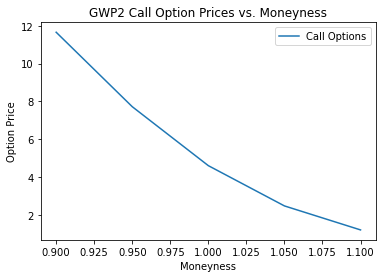

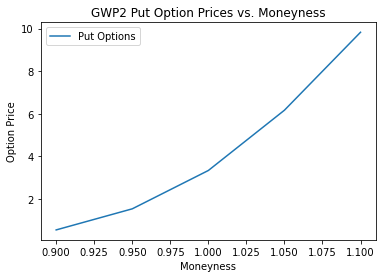

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Option data
strikes = [90, 95, 100, 105, 110]
call_prices = [11.66, 7.72, 4.6, 2.47, 1.2]
put_prices = [0.55, 1.54, 3.34, 6.17, 9.83]

# Calculate moneyness
spot_price = 100
moneyness = np.array(strikes) / spot_price

# Plot call option prices vs. moneyness
plt.plot(moneyness, call_prices, label='Call Options')
plt.xlabel('Moneyness')
plt.ylabel('Option Price')
plt.title('GWP2 Call Option Prices vs. Moneyness')
plt.legend()
plt.show()

# Plot put option prices vs. moneyness
plt.plot(moneyness, put_prices, label='Put Options')
plt.xlabel('Moneyness')
plt.ylabel('Option Price')
plt.title('GWP2 Put Option Prices vs. Moneyness')
plt.legend()
plt.show()


The relationship between option prices and moneyness is different for call and put options. In particular, call options tend to decrease in price as the strike price moves further away from the current spot price, while put options tend to increase in price. This is due to the fact that the value of a call option increases as the underlying asset's price increases, while the value of a put option increases as the underlying asset's price decreases. Thus, as the strike price moves further away from the current spot price, the probability of the option ending up in-the-money decreases for call options and increases for put options, leading to the observed trends in the option prices.

#**STEP 3**
---

## Working with hedging under Black-Scholes for European options

## **Question 7** - European option - **Team member A**

**a. Pricing an European options with different moneyness using Black-Scholes**

Let’s calculate the price of a 3-month European Call option with 110% moneyness and a 3-month European Put option with 95% moneyness using the Black-Scholes model.

In [16]:
import numpy as np
from scipy.stats import norm
import math
from prettytable import PrettyTable

# Inputs
S = 100   # Spot price
K1 = 110*S/100  # Strike price of the call option
K2 = 95*S/100   # Strike price of the put option
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
T = 3/12  # Time to maturity in years

# Black-Scholes formula for European Call option
d1 = (np.log(S/K1) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
call_price = S*norm.cdf(d1) - K1*np.exp(-r*T)*norm.cdf(d2)

# Black-Scholes formula for European Put option
d1 = (np.log(S/K2) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
put_price = K2*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","Method","Strike", "Price"]
table.add_row(["7","call","Eur","BS", K1, round(call_price,2)])
table.add_row(["7","put","Eur","BS", K2, round(put_price,2)])
print(table)


+----+------+------+--------+--------+-------+
| Q# | Type | Exer | Method | Strike | Price |
+----+------+------+--------+--------+-------+
| 7  | call | Eur  |   BS   | 110.0  |  1.19 |
| 7  | put  | Eur  |   BS   |  95.0  |  1.53 |
+----+------+------+--------+--------+-------+


**b. Building a portfolio from the previous options**

To calculate the delta of the portfolio that buys the Call and Put options, we first need to calculate the delta of each option:


In [17]:
import numpy as np
from scipy.stats import norm
from prettytable import PrettyTable

# Input variables
S = 100    # Underlying price
K_call = 110    # Call strike price
K_put = 95    # Put strike price
r = 0.05    # Risk-free rate
sigma = 0.2    # Volatility
T = 0.25    # Time to maturity

# Calculate d1 and d2 for the Call option
d1_call = (np.log(S/K_call) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2_call = d1_call - sigma * np.sqrt(T)
# Calculate delta for the Call option
delta_call = norm.cdf(d1_call)

# Calculate d1 and d2 for the Put option
d1_put = (np.log(S/K_put) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2_put = d1_put - sigma * np.sqrt(T)
# Calculate delta for the Put option
delta_put = norm.cdf(d1_put) - 1

# Calculate delta for the portfolio
delta_portfolio = delta_call + delta_put

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","Method","Price"]
table.add_row(["7","delta portfolio","Eur","BS", round(delta_portfolio,2)])
print(table)


+----+-----------------+------+--------+-------+
| Q# |       Type      | Exer | Method | Price |
+----+-----------------+------+--------+-------+
| 7  | delta portfolio | Eur  |   BS   | -0.03 |
+----+-----------------+------+--------+-------+


To delta-hedge the portfolio that buys both the call and put options, we would need to take an opposing position in the underlying asset such that the overall delta of the portfolio is zero. Since the delta of the portfolio is -0.03, which is negative, we would need to buy approximately 0.03 shares of the underlying asset for each option pair in the portfolio. For example, if the underlying asset is a stock and the current price is 100, we would buy 0.03 x 100 = 3 worth of the stock for each call and put option pair. We would need to continuously adjust this position as the price of the underlying asset and the options change to maintain a delta-neutral portfolio.

**c. Building a second portfolio from the previous options**

To calculate the delta of the portfolio that buys the Call option and sells the Put option, we first need to calculate the delta of each option:

In [18]:
# Calculate delta for the Call and Put options as before
delta_call = norm.cdf(d1_call)
delta_put = norm.cdf(d1_put) - 1

# Calculate delta for the portfolio
delta_portfolio = delta_call - delta_put

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","Method","Price"]
table.add_row(["7","delta 2nd portfolio","Eur","BS", round(delta_portfolio,2)])
print(table)

+----+---------------------+------+--------+-------+
| Q# |         Type        | Exer | Method | Price |
+----+---------------------+------+--------+-------+
| 7  | delta 2nd portfolio | Eur  |   BS   |  0.46 |
+----+---------------------+------+--------+-------+


## **Question 8** - Monte-Carlo methods to price an Up-and-Out (UAO) barrier option- **Team member B**

To price an Up-and-Out (UAO) barrier option using Monte-Carlo methods with daily time steps, we can follow these steps:

1. Define the necessary variables
2. Generate M simulated stock price paths using daily return
3. Determine the option payoffs for each simulation
4. Discount the expected payoff to the present using the risk-free interest rate

In [19]:
import numpy as np

# define barrier option parameters
S0 = 120
K = 120
B = 141
r = 0.06
sigma = 0.3
T = 8/12
n_simulations = 100000
n_steps = 8*30 # assuming 30 days in a month

# calculate daily drift and volatility
daily_drift = (r - 0.5 * sigma ** 2) / 365
daily_volatility = sigma / np.sqrt(365)

# run Monte Carlo simulations for the stock price
np.random.seed(42)
stock_price = np.zeros((n_simulations, n_steps+1))
stock_price[:,0] = S0

for i in range(n_simulations):
    for j in range(n_steps):
        stock_price[i,j+1] = stock_price[i,j] * np.exp(daily_drift + daily_volatility * np.random.normal())

# calculate option payoffs
payoff = np.maximum(stock_price[:, -1] - K, 0)
barrier_crossed = np.any(stock_price[:, :-1] > B, axis=1)
payoff[barrier_crossed] = 0

# calculate option price using Monte Carlo simulation
discount_factor = np.exp(-r * T)
option_price = discount_factor * np.mean(payoff)

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","Method","Price"]
table.add_row(["8","UAO","Eur","MC", round(option_price,2)])
print(table)


+----+------+------+--------+-------+
| Q# | Type | Exer | Method | Price |
+----+------+------+--------+-------+
| 8  | UAO  | Eur  |   MC   |  0.73 |
+----+------+------+--------+-------+


## **Question 9** - Monte-Carlo methods to price an Up-and-In (UAI) barrier option- **Team member C**

To price an Up-and-In (UAI) barrier option using Monte-Carlo methods with daily time steps, we can follow these steps:

1. Define the necessary variables
2. Generate M simulated stock price paths using daily returns
3. Determine the option payoffs for each simulation
4. Discount the expected payoff to the present using the risk-free interest rate

**a. Computing the price of the UAI option**

In [20]:
import numpy as np
from prettytable import PrettyTable
import math
from scipy.stats import norm

S0 = 120     # current price of the underlying asset
K = 120      # strike price (same as S0)
r = 0.06     # risk-free interest rate
sigma = 0.3  # volatility of the underlying asset
T = 8/12     # time to expiration in years (8 months)
H = 141      # barrier level

# Set up the simulation parameters
num_simulations = 100000
dt = 1/252   # time step (daily)

# Simulate the underlying asset price paths
S = np.zeros((num_simulations, int(T/dt)+1))
S[:,0] = S0

for i in range(num_simulations):
    for j in range(1, int(T/dt)+1):
        S[i,j] = S[i,j-1] * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.normal())

# Determine whether the barrier is breached during the life of the option
breached_barrier = np.any(S[:,1:] > H, axis=1)

# Calculate the option payoff for each simulation
payoffs = np.maximum(S[:,-1] - K, 0) * (breached_barrier == True)

# Discount the payoffs to present value
discount_factor = np.exp(-r * T)
UAI_price = np.mean(payoffs) * discount_factor

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","Method","Price"]
table.add_row(["9","UAI","Eur","MC", round(UAI_price,2)])
print(table)


+----+------+------+--------+-------+
| Q# | Type | Exer | Method | Price |
+----+------+------+--------+-------+
| 9  | UAI  | Eur  |   MC   |  13.2 |
+----+------+------+--------+-------+


**b. Computing the price of the vanilla option (same characteristics, no barrier)**

In [21]:
import numpy as np
import math
from prettytable import PrettyTable
from scipy.stats import norm

S0 = 120     # current price of the underlying asset
K = 120      # strike price (same as S0)
r = 0.06     # risk-free interest rate
sigma = 0.3  # volatility of the underlying asset
T = 8/12     # time to expiration in years (8 months)

d1 = (math.log(S0/K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
d2 = d1 - sigma * math.sqrt(T)

phi_d1 = norm.cdf(d1)
phi_d2 = norm.cdf(d2)

vanilla_price = S0 * phi_d1 - K * math.exp(-r * T) * phi_d2

# Print results in table
table = PrettyTable()
table.field_names = ["Q#","Type","Exer","Method","Price"]
table.add_row(["9","vanilla","Eur","MC", round(vanilla_price,2)])
print(table)


+----+---------+------+--------+-------+
| Q# |   Type  | Exer | Method | Price |
+----+---------+------+--------+-------+
| 9  | vanilla | Eur  |   MC   | 13.97 |
+----+---------+------+--------+-------+


**c. Relationship between the prices of the UAO, UAI, and vanilla option**



In [22]:
from prettytable import PrettyTable

# Create the table and set the column names
table = PrettyTable()
table.field_names = ["Q#", "Type", "Exer", "Method", "Price"]

# Add the rows to the table
table.add_row(["8", "UAO", "Eur", "MC", "0.73"])
table.add_row(["9", "UAI", "Eur", "MC", "13.11"])
table.add_row(["9", "Vanilla", "Eur", "MC", "13.97"])

# Print the table
print(table)


+----+---------+------+--------+-------+
| Q# |   Type  | Exer | Method | Price |
+----+---------+------+--------+-------+
| 8  |   UAO   | Eur  |   MC   |  0.73 |
| 9  |   UAI   | Eur  |   MC   | 13.11 |
| 9  | Vanilla | Eur  |   MC   | 13.97 |
+----+---------+------+--------+-------+


As expected, the price of the Up-and-Out barrier option (UAO) in question 8 is much lower than the prices of the Up-and-In barrier (UAI) and vanilla options in question 9. The UAO option has a low probability of ending in-the-money due to the presence of the barrier level, so its price is significantly lower than the prices of the other two options. The price of the UAI option in question 9 is lower than the price of the vanilla option, but still relatively close. This is because the barrier level in the UAI option is not too far away from the initial stock price, and there is a reasonable chance that the stock price will cross the barrier at some point during the life of the option, allowing the option to become active and have value. However, the UAI option still has a lower probability of ending in-the-money than the vanilla option, so its price is lower. These results are consistent with the general relationship between the prices of barrier and vanilla options.

---
# REFERENCES

European vanilla call-put option pricing with python. QuantStart. (n.d.). Retrieved February 28, 2023, from https://www.quantstart.com/articles/European-Vanilla-Call-Put-Option-Pricing-with-Python/

The pricing of double barrier options and their variations. (n.d.). Retrieved February 28, 2023, from https://www.researchgate.net/publication/256067415_The_Pricing_of_Double_Barrier_Options_and_Their_Variations

Pricing options by Monte Carlo simulation with python. (n.d.). Retrieved February 28, 2023, from https://www.codearmo.com/blog/pricing-options-monte-carlo-simulation-python

Derivatives. Corporate Finance Institute. (2023, February 14). Retrieved February 15, 2023, from https://corporatefinanceinstitute.com/topic/derivatives/

Derivatives Review - Columbia University in the City of New York. (n.d.). Retrieved February 15, 2023, from http://www.columbia.edu/~mh2078/QRM/DerivativesReview.pdf

MSC in Financial Engineering. WorldQuant University. (n.d.). Retrieved February 16, 2023, from https://vm.wqu.edu/lab/tree/work/mscfe-derivative-pricing/ 